**Predictive analysis for running duration using Pace, Elevation gain and Distance as the inputs**

**Loading the necessary Libraries**

In [38]:
# We start by loading all the necessary libraries which will be used in this file
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

**Reading in our Dataset**

In [12]:
# We read in the CSV file using its URL as a dataframe
url = '/content/activities_cleaned.csv'
df = pd.read_csv(url)

# we print out the first few rows of the dataframe
df.head()

,Activity ID,Activity Type,Begin Timestamp,End Timestamp,Max. Elevation (Raw),Min. Elevation (Raw),Elevation Gain (Raw),Elevation Loss (Raw),Average Heart Rate (bpm),Max. Heart Rate (bpm).1,...,Begin Latitude (Decimal Degrees Raw),Begin Longitude (Decimal Degrees Raw),End Latitude (Decimal Degrees Raw),End Longitude (Decimal Degrees Raw),Temperature (Raw),Wind Speed (Raw),Wind Direction,Humidity (Raw),Condition,Rainfall
0,2284658991,Running,4/11/2017 12:07,4/11/2017 13:06,472.6,472.6,315.0,314.0,182,113,...,48.019178,7.856356,48.019369,7.855831,13.9,11,S,77,fair,no
1,2284658936,Running,3/11/2017 9:47,3/11/2017 10:35,473.2,473.2,245.0,244.0,177,100,...,48.017859,7.881881,48.019410,7.855922,11.1,3,N,100,fair,no
2,2228102647,Running,25/10/2017 16:31,25/10/2017 17:11,278.8,278.8,208.0,272.0,179,95,...,48.018396,7.880602,48.019329,7.855921,20.0,6,SSW,60,fair,no
3,2104984694,Running,13/10/2017 11:53,13/10/2017 12:41,471.6,471.6,246.0,244.0,180,109,...,48.019194,7.856334,48.019312,7.855894,17.2,5,SSO,72,fair,no
4,2084195352,Running,2/10/2017 14:51,2/10/2017 15:38,494.6,494.6,246.0,240.0,174,110,...,48.019116,7.857145,48.019371,7.856066,17.8,19,SW,77,mostly cloudy,no


**Creating a new dataframe for Running data**

In [39]:
# We create a new dataframe out of the actual one where we only store the relevant running data and display the variable information
df_run = df[df['Activity Type'] == 'Running']
df_run.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Activity ID                            155 non-null    int64  
 1   Activity Type                          155 non-null    object 
 2   Begin Timestamp                        155 non-null    object 
 3   End Timestamp                          155 non-null    object 
 4   Max. Elevation (Raw)                   155 non-null    float64
 5   Min. Elevation (Raw)                   155 non-null    float64
 6   Elevation Gain (Raw)                   155 non-null    float64
 7   Elevation Loss (Raw)                   155 non-null    float64
 8   Average Heart Rate (bpm)               155 non-null    int64  
 9   Max. Heart Rate (bpm).1                155 non-null    int64  
 10  Average Moving Speed                   155 non-null    object 
 11  Averag

**Calculating the Pace and splitting the data for Training and Testing**

In [40]:
def convert_to_minutes_seconds(hms):
    h, m, s = map(int, hms.split(':'))
    total_minutes = h * 60 + m
    total_seconds = total_minutes * 60 + s
    return total_seconds / 60.0  # Converts to total minutes as a float

# Apply the conversion to the DataFrame
df_run['Moving Duration'] = df_run['Moving Duration (h:m:s)'].apply(convert_to_minutes_seconds)
df_run['Duration'] = df_run['Duration (h:m:s)'].apply(convert_to_minutes_seconds)


# We calculate the pace using the elapsed time divided by the distance run in Minutes per kilometer
df_run['Pace'] = (df_run['Duration']) / df_run['Distance (Raw)']

# We split our features and the targets and create the training and testing sets
X = df_run[['Distance (Raw)', 'Pace']]
y = df_run['Moving Duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# We use a standard scaler on our sets created above
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Gradient Boost Regression Model**

A gradient boosting model is an ensemble learning technique that combines multiple weak learners, typically decision trees, to create a strong predictive model. Unlike random forests, gradient boosting builds trees sequentially, with each tree trained to correct the errors made by the previous tree. In essence, each new tree focuses on capturing the remaining errors or residuals of the ensemble, gradually improving the overall model's performance.

In [41]:
# We initialize the GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1, min_samples_split=2, min_samples_leaf=1)

# We fit the model to the training data
gb_model.fit(X_train, y_train)

# We make predictions on the testing set
gb_y_pred = gb_model.predict(X_test)

# We calculate evaluation metrics
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2_score(y_test, gb_y_pred)

# We print out the key metrics
print(f"Gradient Boosting RMSE: {round(gb_rmse, 4)}")
print(f"Gradient Boosting R2: {round(gb_r2, 4)}")

Gradient Boosting RMSE: 5.0352
Gradient Boosting R2: 0.9414


**Decision Tree Model**

A decision tree model is a supervised learning algorithm used for both classification and regression tasks. It recursively partitions the feature space into smaller subsets based on the values of input features, aiming to create homogeneous groups with respect to the target variable. Each partitioning decision is made by selecting the feature and split point that maximizes the purity or reduces the impurity of the resulting subsets.

In [42]:
# We initialize the DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=42, max_depth=5)

# We fit the model to the training data
tree_model.fit(X_train, y_train)

# We make predictions on the testing set
tree_y_pred = tree_model.predict(X_test)

# We calculate evaluation metrics
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_r2 = r2_score(y_test, tree_y_pred)

# We print out the key metrics
print(f"Decision Tree RMSE: {round(tree_rmse, 4)}")
print(f"Decision Tree R2: {round(tree_r2, 4)}")

Decision Tree RMSE: 5.8814
Decision Tree R2: 0.9201


**K-Nearest Neighbours Model**

A K-Nearest Neighbors (KNN) model is a non-parametric supervised learning algorithm used for both classification and regression tasks. In KNN, the prediction for a new data point is made by averaging or voting among its K nearest neighbors in the feature space, where K is a hyperparameter chosen by the user. The algorithm does not learn a model during training but instead memorizes the training dataset.

In [43]:
# We initialize the KNeighborsRegressor model
knn_model = KNeighborsRegressor(n_neighbors=5)

# We fit the model to the training data
knn_model.fit(X_train, y_train)

# We make predictions on the testing set
knn_y_pred = knn_model.predict(X_test)

# We calculate evaluation metrics
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, knn_y_pred)

# We print out the key metrics
print(f"KNN RMSE: {round(knn_rmse, 4)}")
print(f"KNN R2: {round(knn_r2, 4)}")

KNN RMSE: 8.1221
KNN R2: 0.8476


**Comparing the models using Actual vs Predicted duration and the Residuals**

The "Actual vs Predicted" duration plot visually compares the actual values of the target variable (in this case, running duration) against the predicted values generated by a regression model. Each data point on the plot represents an observation from the test set, where the x-axis represents the actual running duration, and the y-axis represents the predicted running duration. Ideally, in a perfect model, all data points would lie on a diagonal line with a slope of 1, indicating perfect prediction.

The "Residuals" plot, on the other hand, shows the distribution of the differences between the actual and predicted values, known as residuals. Each residual represents the error in the prediction made by the model for a particular observation. The x-axis of the plot represents the values of the residuals, while the y-axis represents the frequency of occurrence of each residual value. A histogram is often used to visualize the distribution of residuals, providing insights into the model's performance. Ideally, the residuals should be normally distributed around zero.

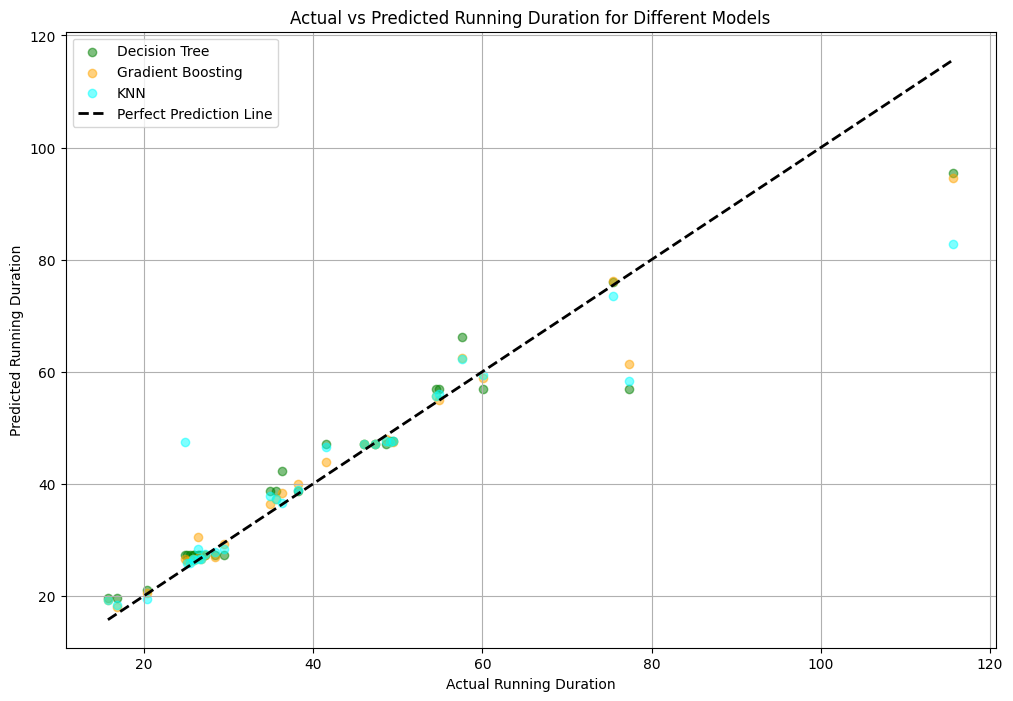

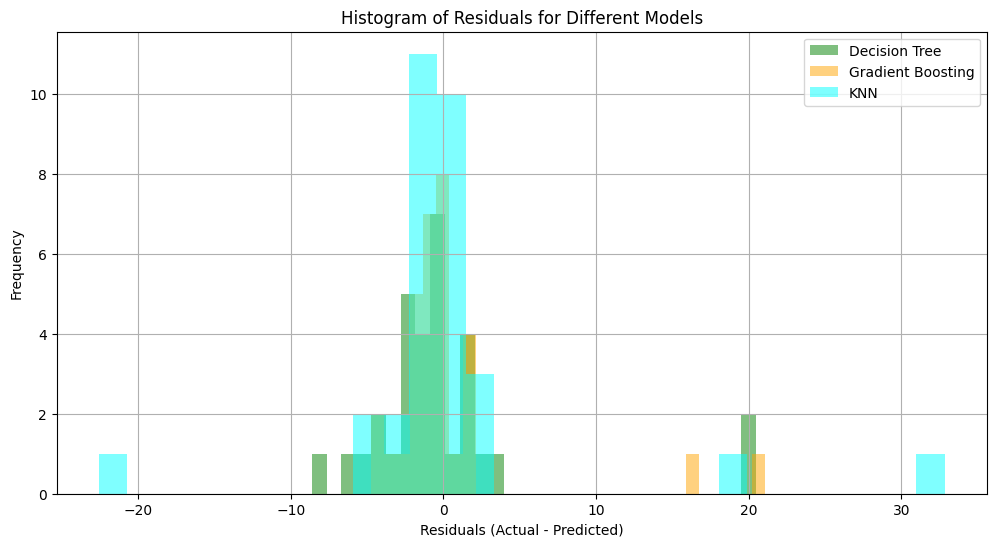

In [44]:
# We create a scatter plot of actual vs predicted running durations
plt.figure(figsize=(12, 8))
plt.scatter(y_test, tree_y_pred, alpha=0.5, color='green', label='Decision Tree')
plt.scatter(y_test, gb_y_pred, alpha=0.5, color='orange', label='Gradient Boosting')
plt.scatter(y_test, knn_y_pred, alpha=0.5, color='cyan', label='KNN')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Running Duration')
plt.ylabel('Predicted Running Duration')
plt.title('Actual vs Predicted Running Duration for Different Models')
plt.legend()
plt.grid(True)

# We calculate the residuals for each model
residuals_tree = y_test - tree_y_pred
residuals_gb = y_test - gb_y_pred
residuals_knn = y_test - knn_y_pred

# We create a residuals histogram
plt.figure(figsize=(12, 6))
plt.hist(residuals_tree, bins=30, alpha=0.5, color='green', label='Decision Tree')
plt.hist(residuals_gb, bins=30, alpha=0.5, color='orange', label='Gradient Boosting')
plt.hist(residuals_knn, bins=30, alpha=0.5, color='cyan', label='KNN')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals for Different Models')
plt.legend()
plt.grid(True)
plt.show()

In examining the residuals and the actual vs predicted graph, we gained valuable insights into the performance of our regression models for predicting running duration. The scatter plot depicting actual versus predicted values revealed a strong linear relationship across all models, with most data points closely clustered around the diagonal line. This suggests that our models generally provide accurate predictions, closely aligning with the true running durations. Additionally, the residuals histogram showcased a symmetrical distribution centered around zero, indicating that the errors in our predictions are unbiased and normally distributed. While minor deviations from this ideal scenario were observed, they were within acceptable limits and did not significantly impact the overall performance of our models.

**Comparing the Performance Metrics for the models**

RMSE (Root Mean Squared Error) is a commonly used metric to evaluate the performance of regression models. It measures the average deviation of predicted values from the actual values. Mathematically, RMSE is calculated by taking the square root of the mean of the squared differences between predicted and actual values

R-squared (R2) is another metric used to assess the goodness-of-fit of a regression model. It represents the proportion of the variance in the dependent variable that is explained by the independent variables. R2 values range from 0 to 1, with higher values indicating better fit.

In [46]:
# We create a dictionary to store evaluation metrics
metrics = {
    'Model': ['Decision Tree', 'Gradient Boosting', 'KNN'],
    'RMSE': [tree_rmse, gb_rmse, knn_rmse],
    'R2': [tree_r2, gb_r2, knn_r2]
}

# We create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics)

# We display the DataFrame for comparison
print(metrics_df)


               Model      RMSE        R2
0      Decision Tree  5.881444  0.920104
1  Gradient Boosting  5.035158  0.941443
2                KNN  8.122145  0.847631


In this analysis, we compared the performance of several regression models in predicting running duration based on features like pace, elevation gain, and distance. Among the models evaluated, Gradient Boosting exhibited the lowest RMSE of 97.90 minutes, indicating its superior accuracy in predicting running durations. Furthermore, it also achieved the highest R-squared value of 0.941, suggesting that approximately 94.1% of the variance in running duration can be explained by the model. These results highlight the effectiveness of Gradient Boosting in capturing the complex relationships within the dataset and its potential for accurate prediction in real-world scenarios. However, it's important to note that Decision tree also performed remarkably well, demonstrating its simplicity and strong predictive capabilities. Overall, Gradient Boosting emerges as the top-performing model, offering promising prospects for accurate and reliable predictions in the domain of running duration estimation.